# Cryptocurrencies Analysis
The purpose of this notebook is to visualize the historical performance of all different cryptocurrencies in the dataset and convey some comments about the liquidity analysis for the top 10 biggest coins by market capitalization based on the list from https://coinmarketcap.com/

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [2]:
data = pd.read_csv('cc_ohlcv_by_exchange_landing_202109130813.csv')
data.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date
0,722202,2021-09-12 07:48:47,0.0000,0.0000,0.0000,0.000,0.00,NaN,alpha-usdt,okex,1544400000000,2018-12-10
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.036,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10
2,729209,2021-09-12 07:51:11,0.0000,0.0000,0.0000,0.000,0.00,NaN,lrc-usd,kraken,1544400000000,2018-12-10
3,725205,2021-09-12 07:49:25,0.0000,0.0000,0.0000,0.000,0.00,NaN,gno-usdt,binance,1544400000000,2018-12-10
4,718198,2021-09-12 07:47:40,0.0000,0.0000,0.0000,0.000,0.00,NaN,xvs-usdt,poloniex,1544400000000,2018-12-10


## Assess data
Now, we will take a look at the dataset to get general information about it.

In [3]:
df = data.copy()

In [4]:
df.describe()

,id,open,high,low,price,volume,amount,timestamp
count,837641.000000,8.376410e+05,8.376410e+05,8.376410e+05,8.376410e+05,8.376390e+05,4.289390e+05,8.376410e+05
mean,437840.000000,6.624918e+03,1.783694e+04,6.593647e+03,6.625984e+03,1.136804e+07,8.455479e+07,1.587902e+12
std,241806.272754,1.633558e+05,9.410764e+06,1.633494e+05,1.633547e+05,1.146863e+08,1.859976e+09,2.514086e+10
min,19020.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.544400e+12
25%,228430.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.150728e+03,1.566086e+12
50%,437840.000000,5.610000e-03,5.901000e-03,5.275000e-03,5.640000e-03,0.000000e+00,6.353086e+04,1.587859e+12
75%,647250.000000,5.787000e+00,6.101000e+00,5.488000e+00,5.807000e+00,5.484390e+05,1.756735e+06,1.609632e+12
max,856660.000000,6.991611e+06,8.575500e+09,6.991611e+06,6.991611e+06,1.759856e+10,4.577126e+11,1.631405e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837641 entries, 0 to 837640
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          837641 non-null  int64  
 1   created_at  837641 non-null  object 
 2   open        837641 non-null  float64
 3   high        837641 non-null  float64
 4   low         837641 non-null  float64
 5   price       837641 non-null  float64
 6   volume      837639 non-null  float64
 7   amount      428939 non-null  float64
 8   symbol      837641 non-null  object 
 9   exchange    837641 non-null  object 
 10  timestamp   837641 non-null  int64  
 11  date        837641 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 76.7+ MB


#### Note:
- Missing values for column 'volume' and 'amount'.
- Wrong datatype for column 'created_at', 'date'.

## Clean and analyze data
### Historical performance for each symbol in the dataset
The historical performance based on the price for each cryptocurrency.

By observing the dataset, we realize that all cryptocurrencies were traded by USDT or USD coin base. However, USDT and USD have relatively equal prices, which means 1 USDT is worth relatively 1 USD. Therefore, we will visualize the historical performance for all cryptocurrencies with a USD coin base (assume USDT=USD).

Firstly, we will split the cryptocurrencies out from column 'symbol' and then, assign them to a new column.

In [6]:
# create a function that takes the cryptocurrency out in the column 'symbol'
def split_first_symbol(x):
    if '-usdt' in x:
        return x[:-5]
    else:
        return x[:-4]

In [7]:
# create a new column to save the cryptocurrencies
df['split_symbol'] = df['symbol'].apply(lambda x: split_first_symbol(x))
# test
df.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date,split_symbol
0,722202,2021-09-12 07:48:47,0.0000,0.0000,0.0000,0.000,0.00,NaN,alpha-usdt,okex,1544400000000,2018-12-10,alpha
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.036,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10,lrc
2,729209,2021-09-12 07:51:11,0.0000,0.0000,0.0000,0.000,0.00,NaN,lrc-usd,kraken,1544400000000,2018-12-10,lrc
3,725205,2021-09-12 07:49:25,0.0000,0.0000,0.0000,0.000,0.00,NaN,gno-usdt,binance,1544400000000,2018-12-10,gno
4,718198,2021-09-12 07:47:40,0.0000,0.0000,0.0000,0.000,0.00,NaN,xvs-usdt,poloniex,1544400000000,2018-12-10,xvs


Next, we will check how many distinct cryptocurrencies are in our dataset.

In [8]:
# use len() and set() to get the number of distinct cryptocurrencies and exchanges in the dataset
print('Number of distinct cryptocurrencies: {}'.format(len(set(df['split_symbol']))))
print('Number of distinct cryptocurrency exchanges: {}'.format(len(set(df['exchange']))))

Number of distinct cryptocurrencies: 108
Number of distinct cryptocurrency exchanges: 15


There are 108 different cryptocurrencies and 15 cryptocurrency exchanges in the dataset. To make it easier, we will calculate the average price for each cryptocurrency for each date from all cryptocurrency exchanges. However, if we use the mean() method right away, we will get the wrong outcome because of the occurrence of 0 in column 'price'. Therefore, we will replace 0 with NaN first then apply the mean() method to get the desired outcome. 

In [9]:
# replace 0 with NaN in column 'price'
df['price'].replace(0, np.nan, inplace=True)
# test
df.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date,split_symbol
0,722202,2021-09-12 07:48:47,0.0000,0.0000,0.0000,NaN,0.00,NaN,alpha-usdt,okex,1544400000000,2018-12-10,alpha
1,737217,2021-09-12 07:52:12,0.0365,0.0371,0.0349,0.036,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10,lrc
2,729209,2021-09-12 07:51:11,0.0000,0.0000,0.0000,NaN,0.00,NaN,lrc-usd,kraken,1544400000000,2018-12-10,lrc
3,725205,2021-09-12 07:49:25,0.0000,0.0000,0.0000,NaN,0.00,NaN,gno-usdt,binance,1544400000000,2018-12-10,gno
4,718198,2021-09-12 07:47:40,0.0000,0.0000,0.0000,NaN,0.00,NaN,xvs-usdt,poloniex,1544400000000,2018-12-10,xvs


Then, we will categorize the dataset by the cryptocurrency and the date. Now, we can apply the mean() method to get the average price for each cryptocurrency for each date from all cryptocurrency exchanges.

In [10]:
# categorize the dataset based on cryptocurrency and date
hist_perf_df = df.groupby(['split_symbol', 'date']).mean()
# test
hist_perf_df

id      open      high       low  \
split_symbol date                                                      
1inch        2018-12-10  252067.363636  0.000000  0.000000  0.000000   
             2018-12-11  252068.363636  0.000000  0.000000  0.000000   
             2018-12-12  252069.363636  0.000000  0.000000  0.000000   
             2018-12-13  252070.363636  0.000000  0.000000  0.000000   
             2018-12-14  252071.363636  0.000000  0.000000  0.000000   
...                                ...       ...       ...       ...   
zrx          2021-09-08  855977.000000  1.011682  1.046727  0.891909   
             2021-09-09  855978.000000  1.008182  1.076545  0.988064   
             2021-09-10  855979.000000  1.067636  1.108727  0.973145   
             2021-09-11  855980.000000  1.005409  1.044455  0.990482   
             2021-09-12  855981.000000  1.025545  1.074455  0.989209   

                            price        volume        amount     timestamp  
split_symbol date                                                            
1inch        2018-12-10       NaN  0.000000e+00           NaN  1.544400e+12  
             2018-12-11       NaN  0.000000e+00           NaN  1.544486e+12  
             2018-12-12       NaN  0.000000e+00           NaN  1.544573e+12  
             2018-12-13       NaN  0.000000e+00           NaN  1.544659e+12  
             2018-12-14       NaN  0.000000e+00           NaN  1.544746e+12  
...                           ...           ...           ...           ...  
zrx          2021-09-08  1.008182  5.128548e+06  5.089590e+06  1.631059e+12  
             2021-09-09  1.067636  3.102312e+06  2.900098e+06  1.631146e+12  
             2021-09-10  1.005409  3.211190e+06  3.186317e+06  1.631232e+12  
             2021-09-11  1.025545  1.083039e+06  1.050994e+06  1.631318e+12  
             2021-09-12  1.055182  1.218497e+06  1.148339e+06  1.631405e+12  

[108864 rows x 8 columns]

In [11]:
# assign the number of distinct cryptocurrencies to a variable
crytocurrencies = set(df['split_symbol'])

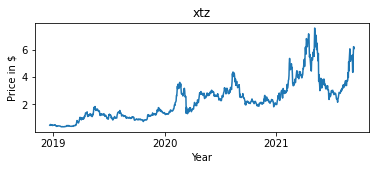

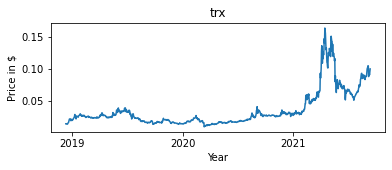

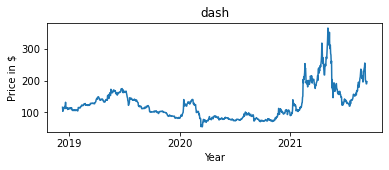

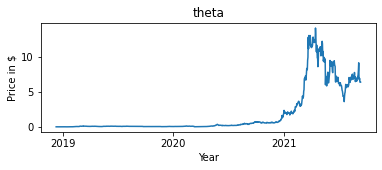

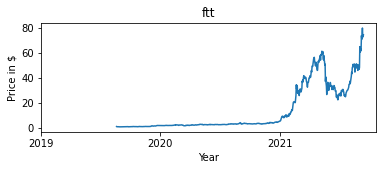

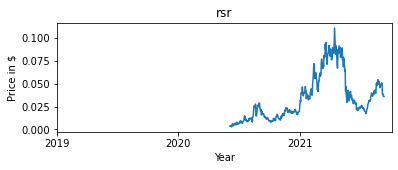

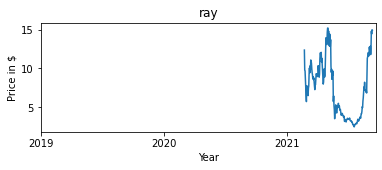

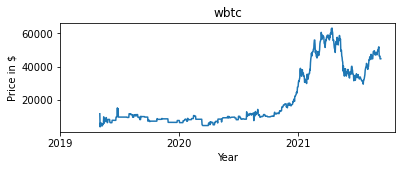

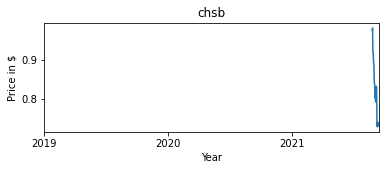

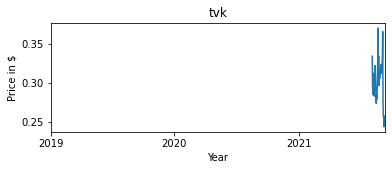

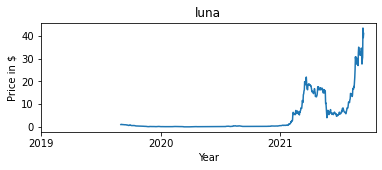

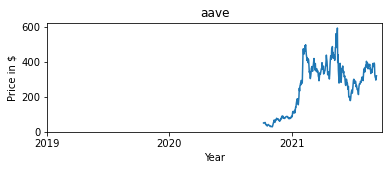

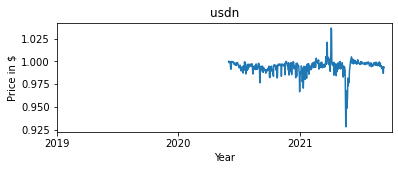

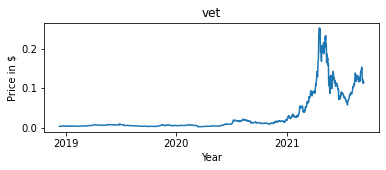

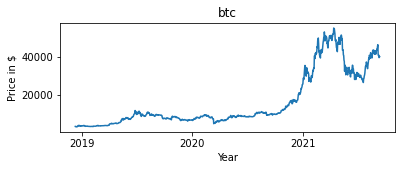

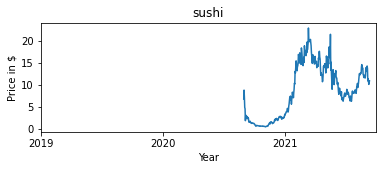

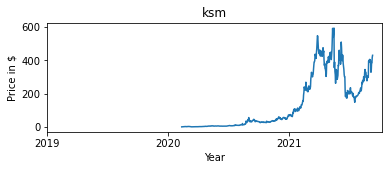

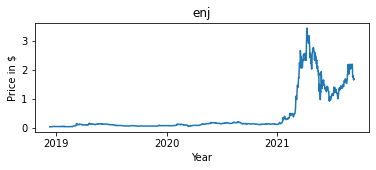

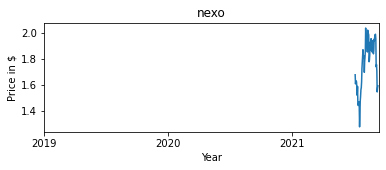

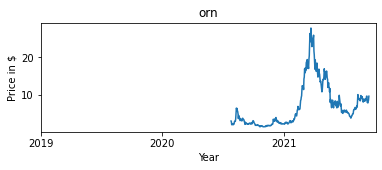

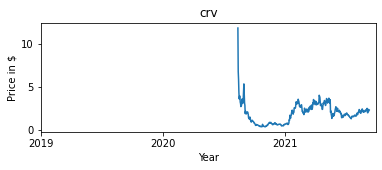

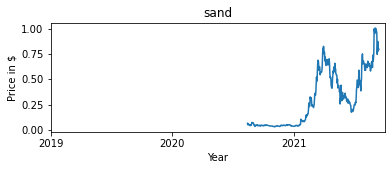

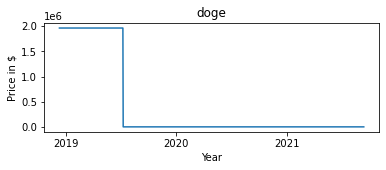

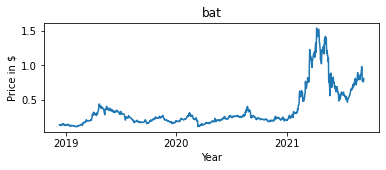

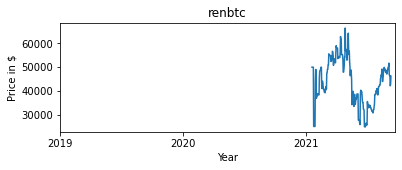

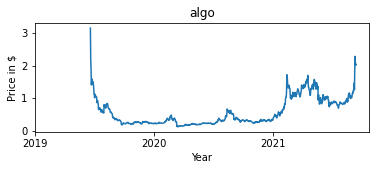

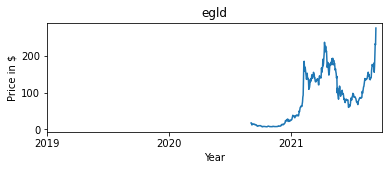

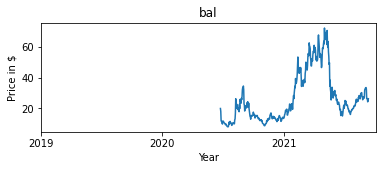

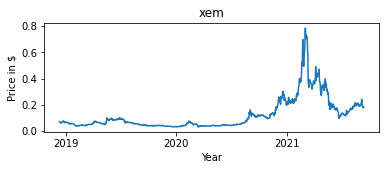

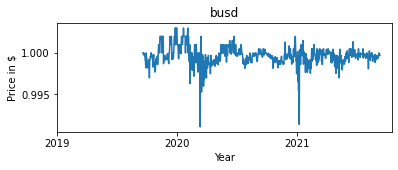

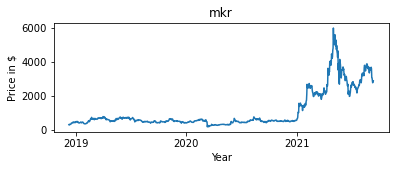

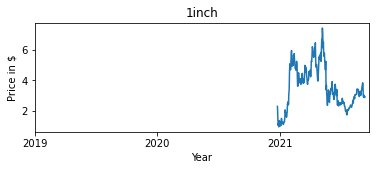

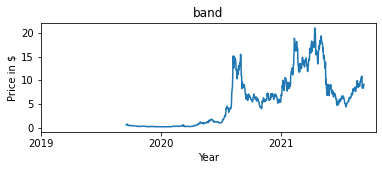

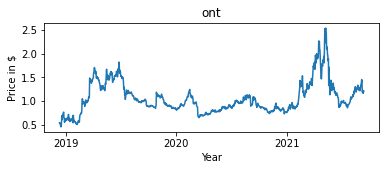

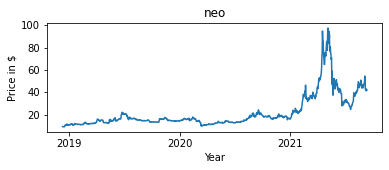

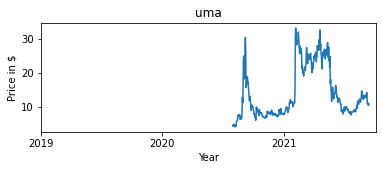

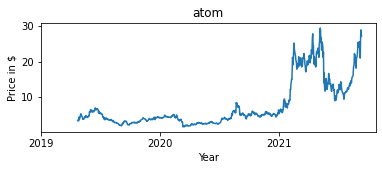

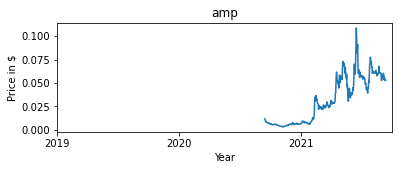

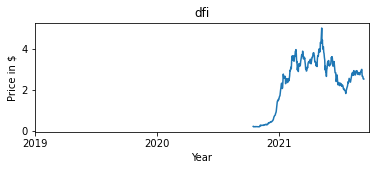

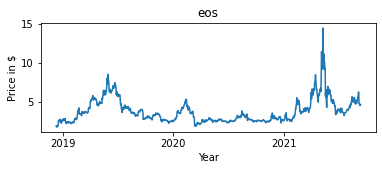

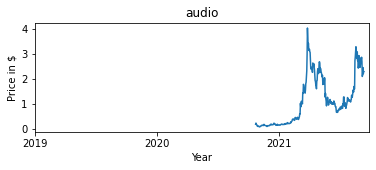

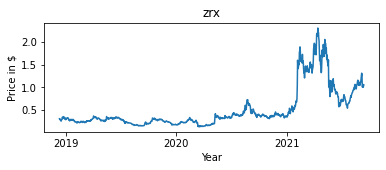

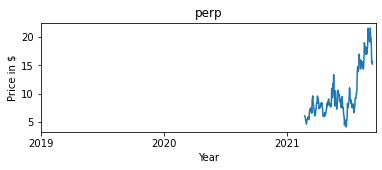

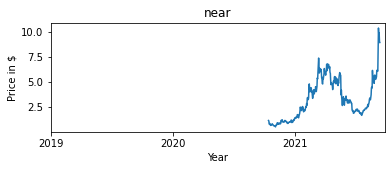

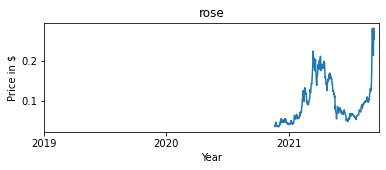

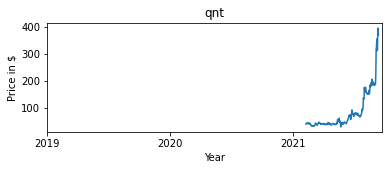

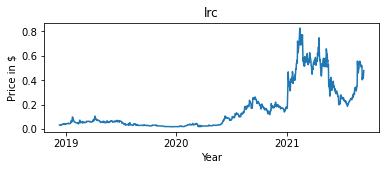

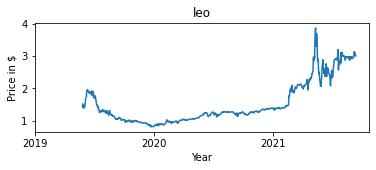

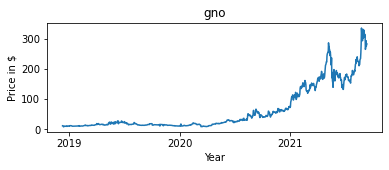

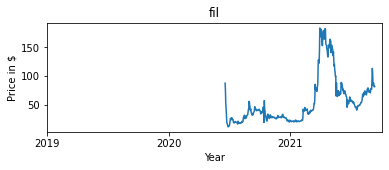

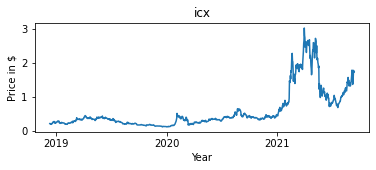

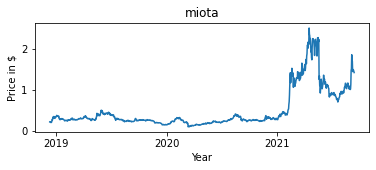

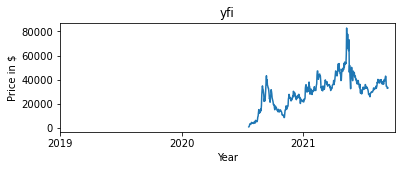

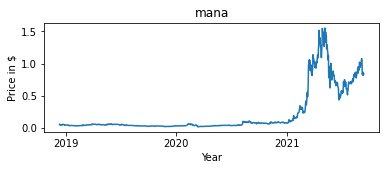

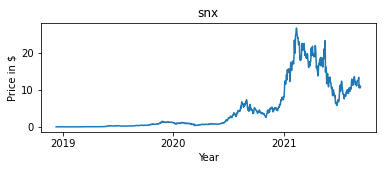

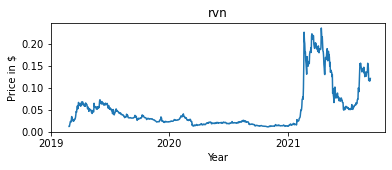

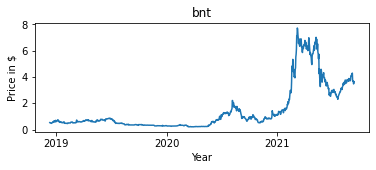

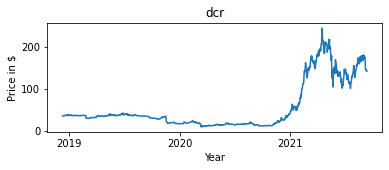

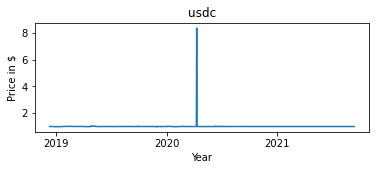

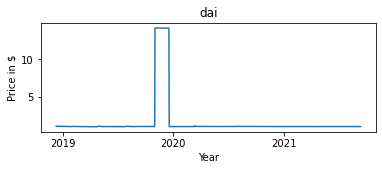

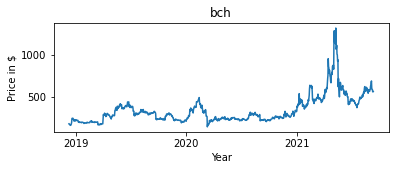

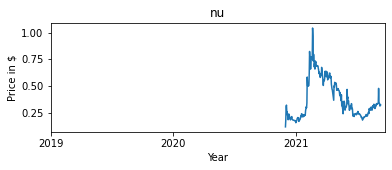

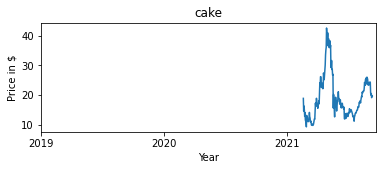

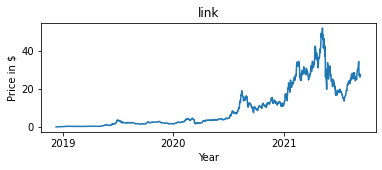

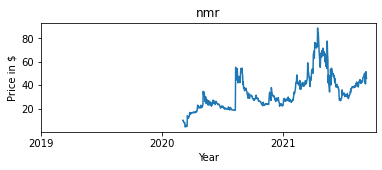

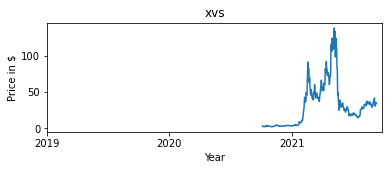

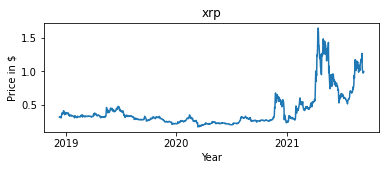

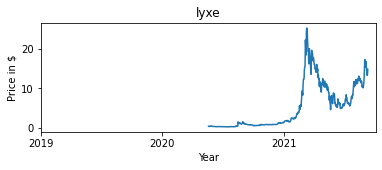

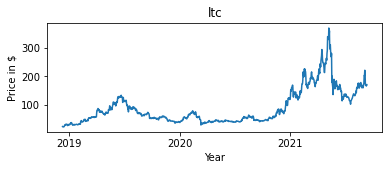

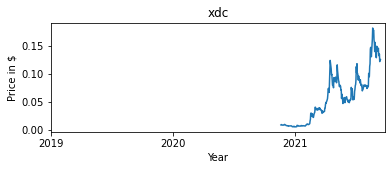

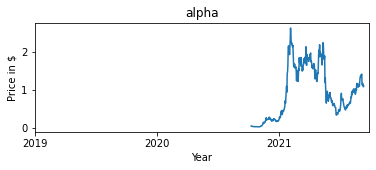

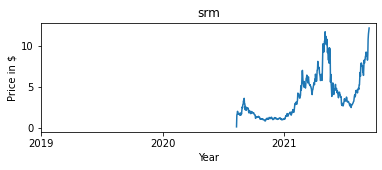

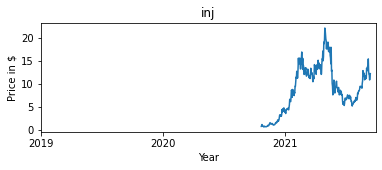

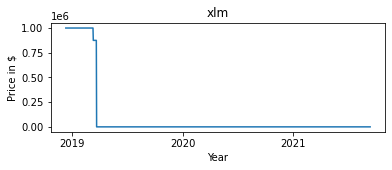

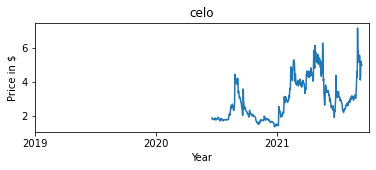

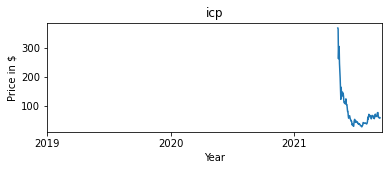

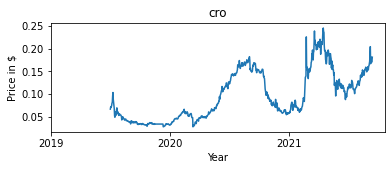

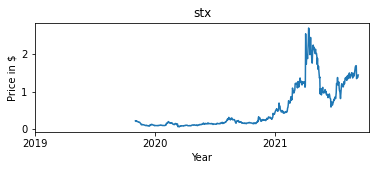

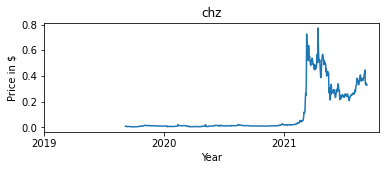

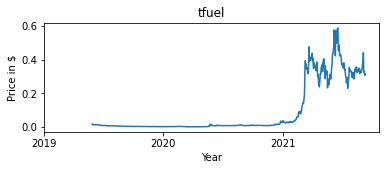

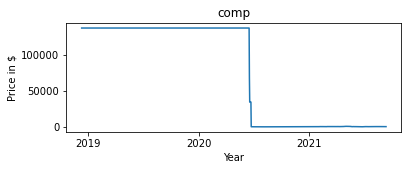

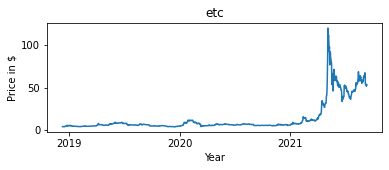

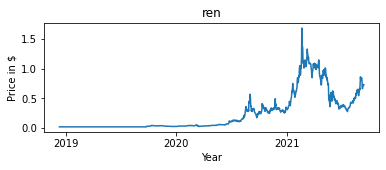

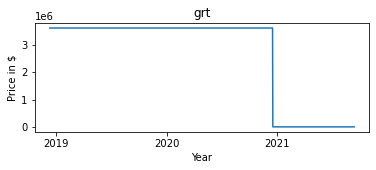

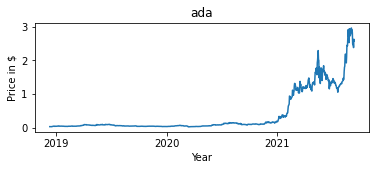

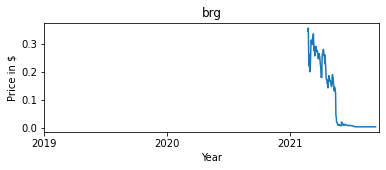

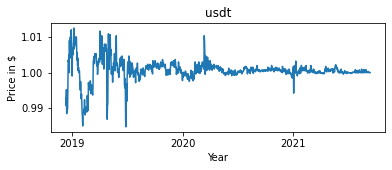

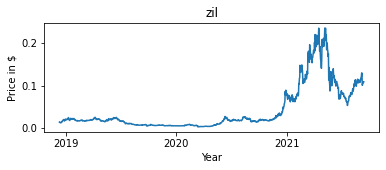

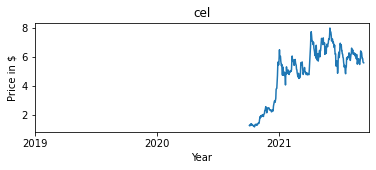

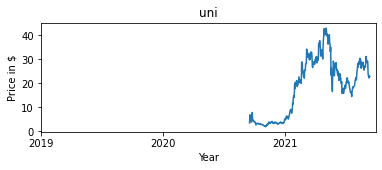

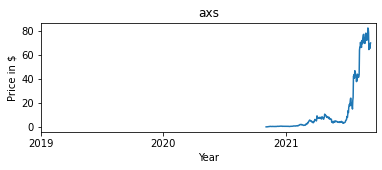

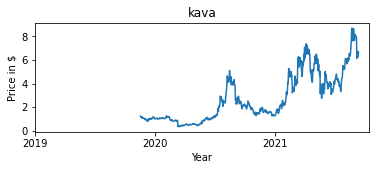

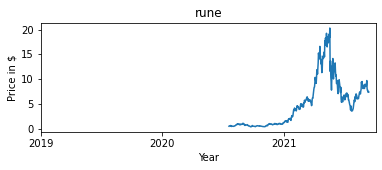

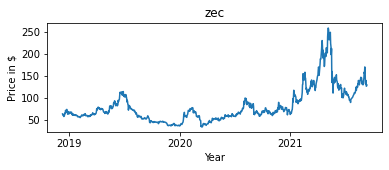

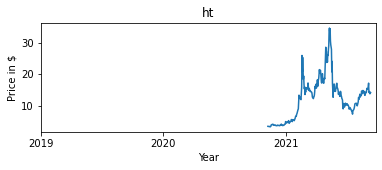

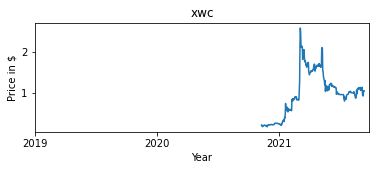

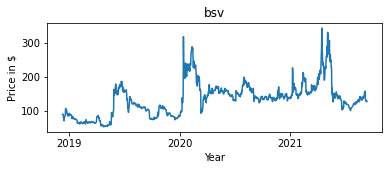

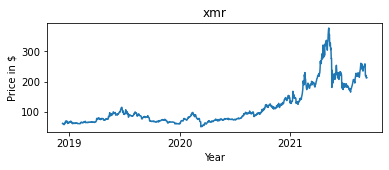

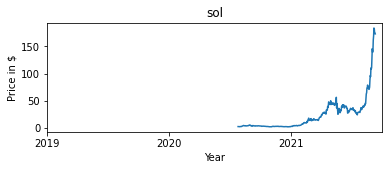

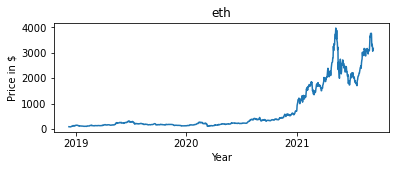

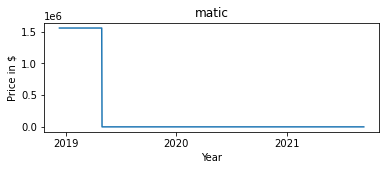

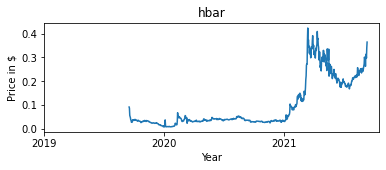

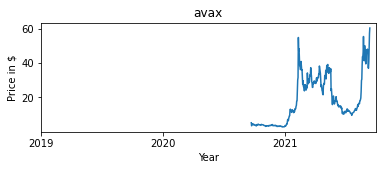

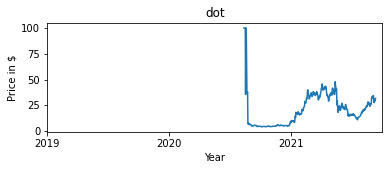

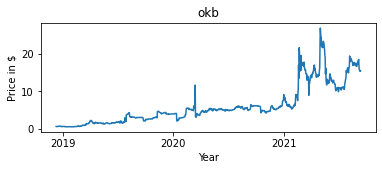

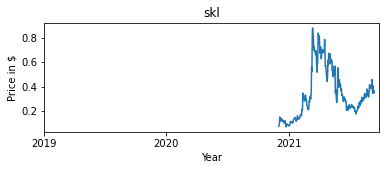

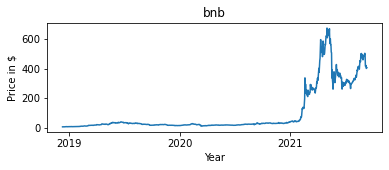

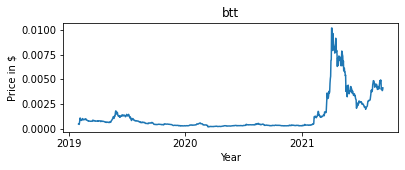

In [12]:
for i in crytocurrencies:
    symbol_df = hist_perf_df.loc[i,:] # create a new dataframe for each cryptocurrency
    plt.figure(figsize=[6,2])
    plt.plot(symbol_df.price.index, symbol_df.price) # plot the chart
    plt.ylabel('Price in $')
    plt.xlabel('Year')
    plt.xticks(['2019-01-01','2020-01-01', '2021-01-01'], [2019, 2020, 2021])
    plt.title(i)
    plt.show()
    print()

There are 7 cryptocurrencies that have a strange shape in our dataset. They are Polygon (MATIC), Compound (COMP), The Graph (GRT), Dai (DAI), Dogecoin (DOGE), Stellar (XLM), and USD Coin (USDC). The occurrence of this problem could be the effect of outliers. Therefore, we will assess and improve them.

In [13]:
# assess the price of Polygon
hist_perf_df.loc['matic',:]['price'].value_counts().head()

1.559324e+06    141
1.432000e-02      4
1.062000e-02      3
1.087000e-02      3
1.121000e-02      3
Name: price, dtype: int64

After assessing the rest of those 7 cryptocurrencies, we realize that there are really some outliers in those cryptocurrencies. Additionally, we do not have any precise values to substitute them, so we just drop those outliers.

We will use the Interquartile Range (IQR) method to eliminate those outliers.

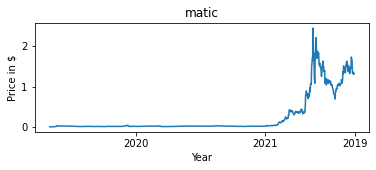

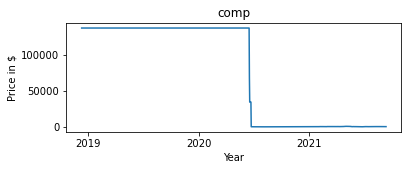

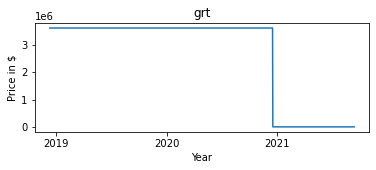

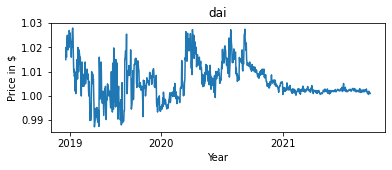

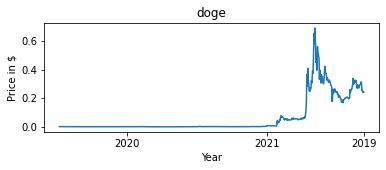

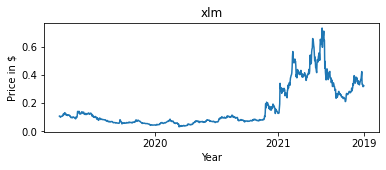

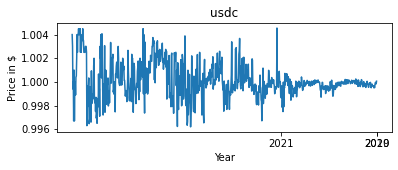

In [14]:
outlier_cryptos = ['matic', 'comp', 'grt', 'dai', 'doge', 'xlm', 'usdc'] # those cryptocurrencies which have outliers inside
for i in outlier_cryptos:
    symbol_df = hist_perf_df.loc[i,:]
    q1 = symbol_df['price'].quantile(0.25)
    q3 = symbol_df['price'].quantile(0.75)
    iqr = q3-q1
    toprange = q3+iqr*1.5
    botrange = q1-iqr*1.5
    symbol_df.drop(symbol_df[symbol_df['price'] > toprange].index, inplace=True)
    symbol_df.drop(symbol_df[symbol_df['price'] < botrange].index, inplace=True)
    
    plt.figure(figsize=[6,2])
    plt.plot(symbol_df.price.index, symbol_df.price) # plot the chart
    plt.ylabel('Price in $')
    plt.xlabel('Year')
    plt.xticks(['2019-01-01','2020-01-01', '2021-01-01'], [2019, 2020, 2021])
    plt.title(i)
    plt.show()
    print()
    

For the Compound (COMP) and the Graph (GRT), we will manually fix them.

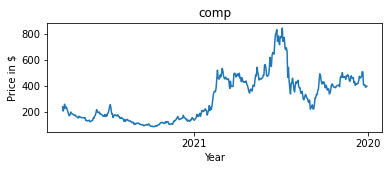

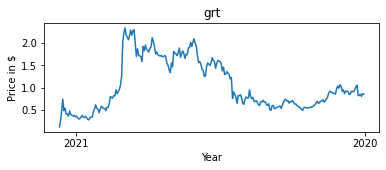

In [15]:
for i in ['comp', 'grt']:
    plt.figure(figsize=[6,2])
    symbol_df = hist_perf_df.loc[i,:]
    symbol_df = symbol_df[symbol_df['price']<30000] # drop outliers
    plt.plot(symbol_df.price.index, symbol_df.price) # plot the chart
    plt.ylabel('Price in $')
    plt.xlabel('Year')
    plt.xticks(['2020-01-01', '2021-01-01'], [2020, 2021])
    plt.title(i)
    plt.show()
    print()

### Liquidity of top 10 biggest coins
Liquidity is judged by how easily a cryptocurrency can be bought and sold. In this section, it is the volume.

A liquidity analysis for the top 10 biggest coins by market capitalization based on the list from https://coinmarketcap.com/ on September 23rd, 2021. Therefore, those coins are (descending in terms of market capitalization):
- Bitcoin BTC
- Ethereum ETH
- Cardano ADA
- Tether USDT
- Binace Coin BNB
- XRP XRP
- Solana SOL
- Polkadot DOT
- USD Coin USDC
- Dogecoin DOGE

In [16]:
biggest_coins = ['btc', 'eth', 'ada', 'usdt', 'bnb', 'xrp', 'sol', 'dot', 'usdc', 'doge']

Next, we will categorize the dataset by the cryptocurency and the date. Then, we can apply the sum() method to get the total volume for each cryptocurrency for each date from all cryptocurrency exchanges.

In [17]:
liquid_df = df.groupby(['split_symbol', 'date']).sum()
# test
liquid_df

id     open    high      low    price  \
split_symbol date                                                     
1inch        2018-12-10  2772741   0.0000   0.000   0.0000   0.0000   
             2018-12-11  2772752   0.0000   0.000   0.0000   0.0000   
             2018-12-12  2772763   0.0000   0.000   0.0000   0.0000   
             2018-12-13  2772774   0.0000   0.000   0.0000   0.0000   
             2018-12-14  2772785   0.0000   0.000   0.0000   0.0000   
...                          ...      ...     ...      ...      ...   
zrx          2021-09-08  9415747  11.1285  11.514   9.8110  11.0900   
             2021-09-09  9415758  11.0900  11.842  10.8687  11.7440   
             2021-09-10  9415769  11.7440  12.196  10.7046  11.0595   
             2021-09-11  9415780  11.0595  11.489  10.8953  11.2810   
             2021-09-12  9415791  11.2810  11.819  10.8813  11.6070   

                              volume        amount       timestamp  
split_symbol date                                                   
1inch        2018-12-10         0.00  0.000000e+00  16988400000000  
             2018-12-11         0.00  0.000000e+00  16989350400000  
             2018-12-12         0.00  0.000000e+00  16990300800000  
             2018-12-13         0.00  0.000000e+00  16991251200000  
             2018-12-14         0.00  0.000000e+00  16992201600000  
...                              ...           ...             ...  
zrx          2021-09-08  56414022.67  5.598548e+07  17941651200000  
             2021-09-09  34125434.37  3.190108e+07  17942601600000  
             2021-09-10  35323085.29  3.504949e+07  17943552000000  
             2021-09-11  11913427.01  1.156094e+07  17944502400000  
             2021-09-12  13403467.73  1.263173e+07  17945452800000  

[108864 rows x 8 columns]

At this stage, we will build the chart for each volume of the top 10 biggest coins from December 10th, 2018 to September 12nd, 2021.

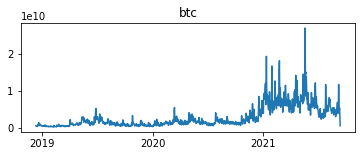

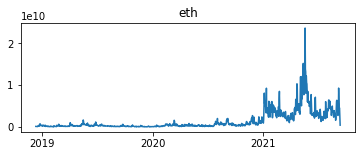

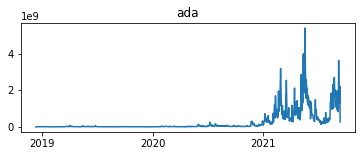

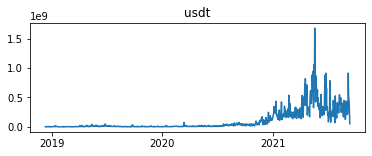

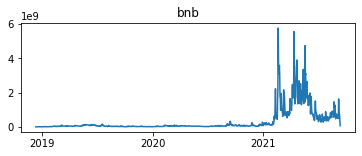

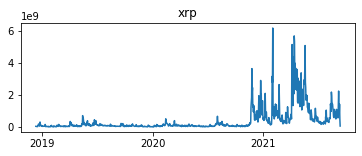

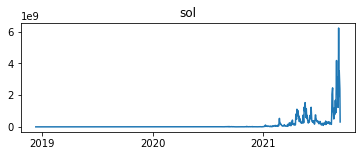

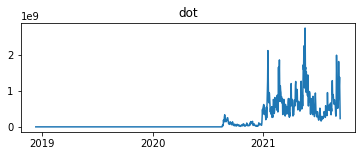

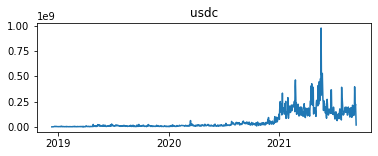

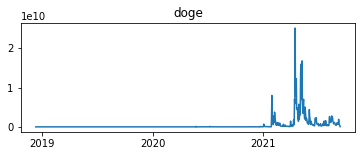

In [18]:
for i in biggest_coins:
    plt.figure(figsize=[6,2])
    biggest_coins_df = liquid_df.loc[i,:] # create a new dataframe for each cryptocurrency
    plt.plot(biggest_coins_df['volume'].index, biggest_coins_df['volume']) # plot the line chart
    plt.xticks(['2019-01-01','2020-01-01', '2021-01-01'], [2019, 2020, 2021])
    plt.title(i)
    plt.show()

In those graphs above, the common features of the top 10 biggest coins by market capitalization are the huge volume and the strong fluctuation. The huge volume means that there are a lot of people who are using those coins. The fluctuation means that those coins are traded very often. Therefore, those two features make the coins more liquidity. 